# LinReg with PyTorch, Gradient Descent, and GPU

## Init, helpers, utils ...

In [1]:
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from IPython.core.debugger import set_trace

# The Problem

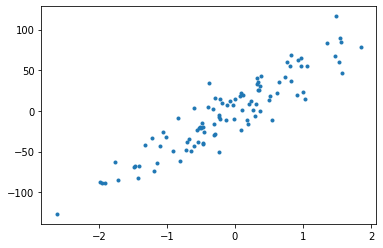

In [4]:
from sklearn.datasets import make_regression


n_features = 1
n_samples = 100

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=20,
    random_state=42,
)

fix, ax = plt.subplots()
ax.plot(X, y, ".")

# The Solution

In [5]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

In [6]:
class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.beta(X)

In [7]:
model = LinReg(n_features).to(DEVICE)  # <-- here
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


X, y = X.to(DEVICE), y.to(DEVICE)  # <-- here

No handles with labels found to put in legend.


cpu


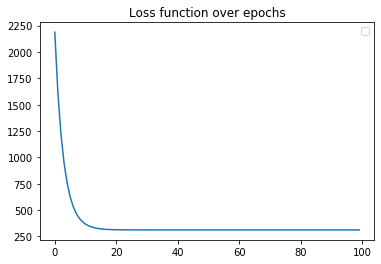

In [8]:
# Device
print(DEVICE)

NUM_EPOCS = 100

# Train step
# Set the model in the train model
model.train()  # <-- here

losses = []

for epoch in range(NUM_EPOCS):
    # Nulls the gradients
    optimizer.zero_grad()
    
    # Do one forward pass with the data
    y_ = model(X)
    # calculate the loss 
    loss = loss_fn(y_, y)
    
    # Run a backward propagation
    loss.backward()
    # Optimizer updates the model parameters
    optimizer.step()
    losses.append(loss.item())

# Visualize the output
fig, ax = plt.subplots()
ax.plot(losses)
ax.set_title("Loss function over epochs")
ax.legend();

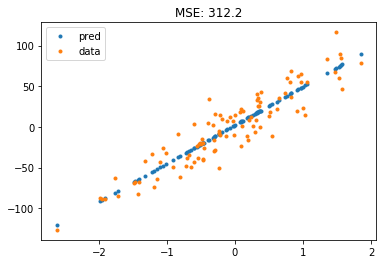

In [9]:
# Eval
model.eval()  # <-- here
with torch.no_grad():
    y_ = model(X)    
    
# Visualize the output
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();

Note: I did gradient descent with all the data. I did not split the data into `train` and `valid` which should be done!

# Exercise:
- Write a proper training loop for this linear regression example.
- Split data into train and valid.
- Use the Dataset and DataLoader abstraction.
- Create a logistic regression module.
- Create a Multi Layer Perceptron (MLP).